# **Artificial Neural Network - Iris Dataset**

In [266]:
import numpy as np
import pandas as pd

## *Loading The Data And Extracting Information From It*

In [267]:
URL = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(URL)

In [268]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [270]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [271]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

## *Plotting Some Graphs.....*

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

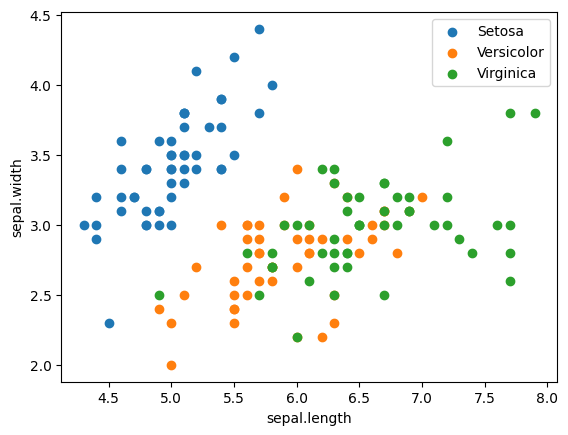

In [273]:
for target in df["variety"].unique():
  df_plot = df[df["variety"] == target]

  plt.scatter(
      df_plot["sepal.length"],
      df_plot["sepal.width"],
      label = target
  )

plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.legend()

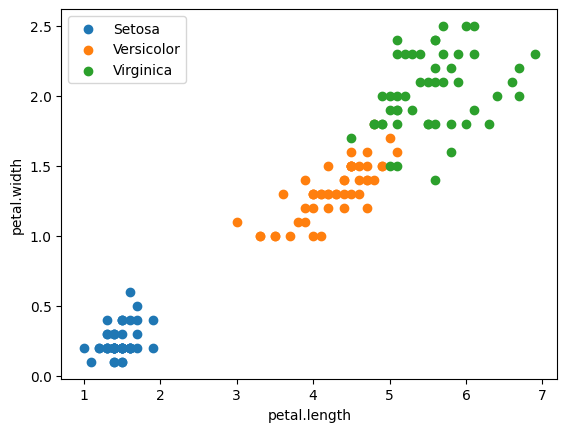

In [274]:
for target in df["variety"].unique():
  df_plot = df[df["variety"] == target]

  plt.scatter(
      df_plot["petal.length"],
      df_plot["petal.width"],
      label = target
  )

plt.xlabel("petal.length")
plt.ylabel("petal.width")
plt.legend()

## *Performing Operations On The Data (Encoding, Scaling, etc.)*

In [275]:
'''
# One Hot Label Encoding
df_encoded = pd.get_dummies(df, columns = ["variety"])
df_encoded.head()
'''
encoding = {
    "Setosa" : 0,
    "Versicolor" : 1,
    "Virginica" : 2
}

df["variety"] = [encoding[i] for i in df["variety"]]
df_encoded = df.copy()

In [276]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_encoded.drop("variety", axis = "columns").to_numpy()),
    columns = df_encoded.drop("variety", axis = "columns").columns
).join(df["variety"])

df_scaled.describe()

,sepal.length,sepal.width,petal.length,petal.width,variety
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [277]:
df_scaled.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [278]:
correlation_matrix = df_scaled.corr()
correlation_matrix["variety"].sort_values()

sepal.width    -0.426658
sepal.length    0.782561
petal.length    0.949035
petal.width     0.956547
variety         1.000000
Name: variety, dtype: float64

## *Training And Testing Data!*

In [279]:
x = df_scaled.drop("variety", axis = "columns").values
y = df_scaled["variety"].values

In [280]:
x[0], y[0]

(array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]), 0)

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 17)

In [282]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [283]:
import torch.nn as nn
import torch.optim as optim
import torch.cuda as cuda
from torch.utils.data import TensorDataset, DataLoader
from torch import FloatTensor, LongTensor

In [284]:
device = "cuda" if cuda.is_available() else "cpu"
device

'cuda'

In [285]:
x_train, x_test = FloatTensor(x_train).to(device), FloatTensor(x_test).to(device)
y_train, y_test = LongTensor(y_train).to(device), LongTensor(y_test).to(device)

In [286]:
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

In [287]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

## *Coding The Neural Network*

In [288]:
class ANN(nn.Module):

  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(in_features = 4,   out_features = 256)
    self.fc2 = nn.Linear(in_features = 256, out_features = 128)
    self.fc3 = nn.Linear(in_features = 128, out_features = 128)
    self.fc4 = nn.Linear(in_features = 128, out_features = 84)
    self.fc5 = nn.Linear(in_features = 84,  out_features = 3)

    self.ReLU = nn.ReLU()
    self.Dropout = nn.Dropout(p = 0.5)

  def forward(self, x):
    x = self.fc1(x)
    x = self.ReLU(x)
    x = self.fc2(x)
    x = self.ReLU(x)
    x = self.Dropout(x)
    x = self.fc3(x)
    x = self.ReLU(x)
    x = self.Dropout(x)
    x = self.fc4(x)
    x = self.ReLU(x)
    x = self.fc5(x)

    return x

In [289]:
from torch import manual_seed
manual_seed(42)

In [290]:
Model = ANN().to(device)

## *Training*

In [291]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(), lr = 0.01)

In [292]:
import torch

In [293]:
epochs = 100

training_losses = []
testing_losses = []
training_accuracies = []
testing_accuracies = []

for epoch in range(epochs):

  Model.train()

  training_correct = 0
  for batch, (x_train, y_train) in enumerate(train_loader):
    y_pred = Model(x_train)
    loss = loss_fn(y_pred, y_train)

    training_correct += (torch.argmax(y_pred, 1) == y_train).sum()
    training_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (batch + 1) % 2 == 0:
      print(f"Epoch : {epoch + 1} | Batch : {batch + 1} | Loss : {loss.item()}")
  training_accuracies.append(training_correct / len(train_data))

  Model.eval()

  with torch.no_grad():
    testing_correct = 0
    for batch, (x_test, y_test) in enumerate(test_loader):
      y_pred = Model(x_test)
      loss = loss_fn(y_pred, y_test)

      testing_losses.append(loss.item())
      testing_correct += (torch.argmax(y_pred, 1) == y_test).sum()
      print(f"Epoch : {epoch + 1} | Validation Batch : {batch} | Validation Loss : {loss.item()}")
    testing_accuracies.append(testing_correct / len(test_data))

  print(f"Epoch : {epoch + 1} | Training Acc : {training_accuracies[-1]} | Validation Acc : {testing_accuracies[-1]}")

Epoch : 1 | Batch : 2 | Loss : 1.1141340732574463
Epoch : 1 | Batch : 4 | Loss : 1.0639082193374634
Epoch : 1 | Batch : 6 | Loss : 1.1131088733673096
Epoch : 1 | Batch : 8 | Loss : 1.0722384452819824
Epoch : 1 | Batch : 10 | Loss : 1.0578656196594238
Epoch : 1 | Batch : 12 | Loss : 1.1131939888000488
Epoch : 1 | Validation Batch : 0 | Validation Loss : 1.0960662364959717
Epoch : 1 | Validation Batch : 1 | Validation Loss : 1.1111140251159668
Epoch : 1 | Validation Batch : 2 | Validation Loss : 1.0684185028076172
Epoch : 1 | Training Acc : 0.42500001192092896 | Validation Acc : 0.4333333671092987
Epoch : 2 | Batch : 2 | Loss : 1.1497461795806885
Epoch : 2 | Batch : 4 | Loss : 1.1061137914657593
Epoch : 2 | Batch : 6 | Loss : 1.0776798725128174
Epoch : 2 | Batch : 8 | Loss : 1.067594289779663
Epoch : 2 | Batch : 10 | Loss : 1.0980892181396484
Epoch : 2 | Batch : 12 | Loss : 1.0982468128204346
Epoch : 2 | Validation Batch : 0 | Validation Loss : 1.0557403564453125
Epoch : 2 | Validation B

## *Testing And Analysing The Model*

In [296]:
Model.eval()

with torch.no_grad():
  x_testing, y_testing = test_loader.dataset[:]
  y_predicted = torch.argmax(Model(x_testing), 1)
  correct = (y_predicted == y_testing).sum()

print(f"Accuracy : {correct / x_testing.shape[0] * 100} %")

Accuracy : 96.66667175292969 %


In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_pred = y_predicted.cpu(), y_true = y_testing.cpu()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## *Saving The Model*

In [298]:
torch.save(Model.state_dict(), "/content/iris.pt")